DATA LOADING

In [1]:
import numpy as np
import matplotlib.pyplot as plt
#from scipy.io.wavfile import read
import scipy.io

# script importing
from peak_picking import *
from pca import *
from gradient_delay import *

# SFOAE data loading
mat_SFOAE = scipy.io.loadmat('data/SFOAE/sfoae30dBg130TM45R19rs2.mat')

freq_SFOAE = mat_SFOAE['Fvect'].flatten()  # frequency axis
SFOAE = mat_SFOAE['oaeNum30'].flatten()  # SFOAE wave
CRcomp = mat_SFOAE['CRc30'].flatten()  # CR component
NLcomp = mat_SFOAE['Yunl30'].flatten()  # NL component

freq_range_SFOAE = np.size(freq_SFOAE)  # maximum index on the frequency axis

CALCULATING NEEDED VALUES

SFOAE

In [2]:
# peak picking
maximas_SFOAE = findLocalMaxima(np.real(20*np.log10(SFOAE)))
shift = 1  # 3 points around all peaks (the peak is included)
ext_maximas_SFOAE = peakNeighbours(maximas_SFOAE, shift, freq_range_SFOAE)

group_delay_SFOAE = calcDelay(freq_SFOAE, SFOAE)


CR COMPONENT

In [3]:
freq_range_CR = freq_range_SFOAE
freq_CR = freq_SFOAE

# peak picking
maximas_CR = findLocalMaxima(np.real(20*np.log10(CRcomp)))
shift = 1  # 3 points around all peaks (the peak is included)
ext_maximas_CR = peakNeighbours(maximas_CR, shift, freq_range_CR)

group_delay_CR = calcDelay(freq_CR, CRcomp)


NL COMPONENT

In [4]:
freq_range_NL = freq_range_SFOAE
freq_NL = freq_SFOAE

# peak picking
maximas_NL = findLocalMaxima(np.real(20*np.log10(NLcomp)))
shift = 1  # 3 points around all peaks (the peak is included)
ext_maximas_NL = peakNeighbours(maximas_NL, shift, freq_range_NL)

group_delay_NL = calcDelay(freq_NL, NLcomp)


ISOLATED INTENSITY

In [5]:
from isoint import *

ISOINT_start, ISOINT_stop, ISOINT_step = 1000, 3200, 200

freq_ISOINT_list = []
GD_ISOINT_list = []
max_idx_ISOINT_list = []

for i in range(ISOINT_start, ISOINT_stop + 1, ISOINT_step):
    filename = f"data/isointFT/isoint_{i}Hz_Level_30dB_TM45130.mat"
    freq_ISOINT, group_delay_ISOINT, max_idx_ISOINT = processIsoInt(filename)

    freq_ISOINT_list.append(freq_ISOINT)
    GD_ISOINT_list.append(group_delay_ISOINT)
    max_idx_ISOINT_list.append(max_idx_ISOINT)

PLOTTING

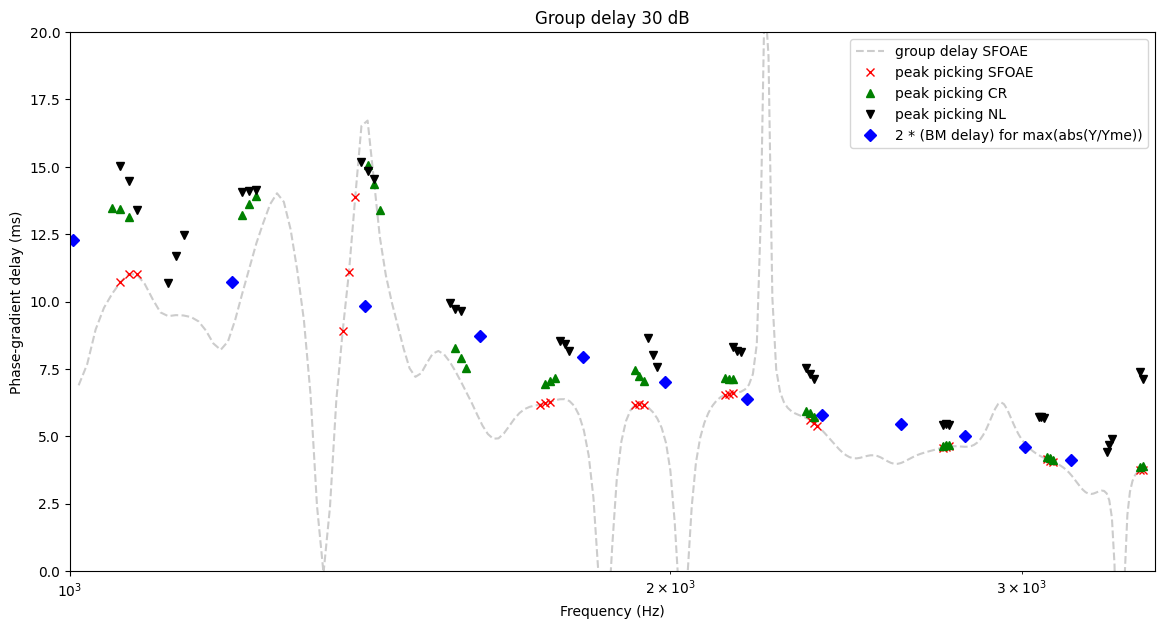

In [6]:
fig, ax = plt.subplots(figsize=(14, 7))

# multiplying by 1000 because of the transfer to miliseconds
ax.plot(freq_SFOAE, 1000*group_delay_SFOAE, '0.8', linestyle='--', label='group delay SFOAE')
ax.plot(freq_SFOAE[ext_maximas_SFOAE], 1000*group_delay_SFOAE[ext_maximas_SFOAE],
        "rx", label='peak picking SFOAE')

ax.plot(freq_CR[ext_maximas_CR], 1000*group_delay_CR[ext_maximas_CR],
        "g^", label='peak picking CR')

ax.plot(freq_NL[ext_maximas_NL], 1000*group_delay_NL[ext_maximas_NL],
        "kv", label='peak picking NL')

# reference values
for i, freq_ISOINT in enumerate(freq_ISOINT_list):
    max_idx = max_idx_ISOINT_list[i]
    grad_delay_ISOINT = GD_ISOINT_list[i]
    ax.plot(freq_ISOINT[max_idx], 1000*grad_delay_ISOINT[max_idx], "bD",
            label='2 * (BM delay) for max(abs(Y/Yme))' if i == 0 else None)
# # for comparing cochlear filter with the NL group delay
# ax.plot(freq_NL[compare_NL-compare_region:compare_NL+compare_region+1], 1000*group_delay_NL[compare_NL-compare_region:compare_NL+compare_region+1], 'k',
#         linestyle='--', label='group delay NL (ROI)')
# # for comparing cochlear filter with the CR group delay
# ax.plot(freq_CR[compare_CR-compare_region:compare_CR+compare_region+1], 1000*group_delay_CR[compare_CR-compare_region:compare_CR+compare_region+1], 'g',
#         linestyle='--', label='group delay CR (ROI)')

ax.set_xscale('log')
ax.set_xlim([1000, 3.5e3])
ax.set_ylim([0, 20])
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Phase-gradient delay (ms)')
ax.legend()
ax.set_title('Group delay 30 dB')
plt.show()
#plt.savefig('Group_delays_30_dB.png')
